<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/MPLNS_27_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [4]:
plt.rcParams["figure.figsize"] = [10,8]
plt.rcParams["image.interpolation"] = "nearest" #togliamo l'interpolazione automatica
plt.rcParams["image.cmap"] = "gist_gray" #useremo bianco e nero

In [8]:
cd /content/drive/MyDrive/MPLNS2023

/content/drive/MyDrive/MPLNS2023


In [9]:
ls

HiggsBoson/     spm-20210427T111354Z-001.zip  wine.data.1  wine.names.1
KaggleTitanic/  wine.data                     wine.names


In [10]:
!unzip spm-20210427T111354Z-001.zip

Archive:  spm-20210427T111354Z-001.zip
  inflating: spm/spm_struct_pos.npy  
  inflating: spm/spm_struct_neg.npy  
  inflating: spm/test_good_all.npy   
  inflating: spm/train_good_all.npy  
  inflating: spm/test_bad_all.npy    
  inflating: spm/train_bad_all.npy   


In [12]:
data=np.load("spm/train_good_all.npy")

In [13]:
data.shape #sono 1302 immagini 64x64

(1302, 64, 64)

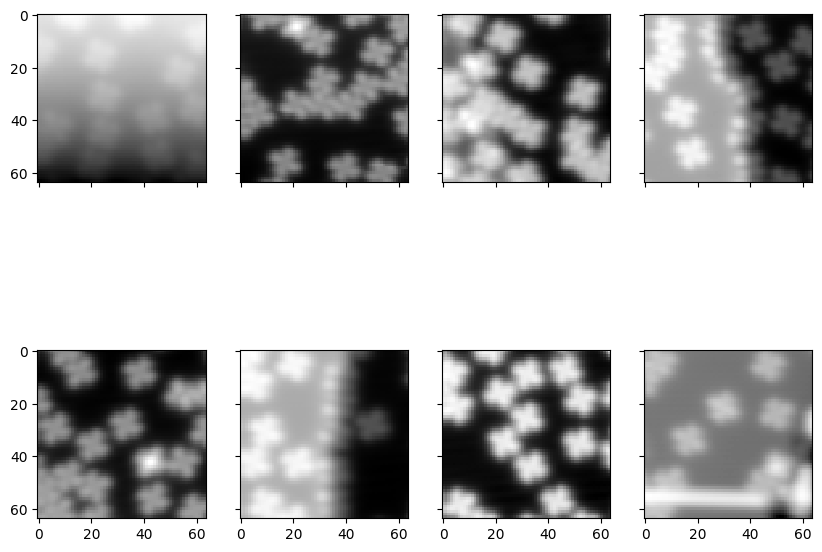

In [14]:
fig,ax=plt.subplots(2,4,sharex=True,sharey=True) #creo gli assi solo all'esterno
for ii in range(8):
  ax[ii//4,ii%4].imshow(data[ii]) #questo serve a selezionare gli indici giusti

In [ ]:
#dobbiamo riconoscere queste croci nelle immagini
#per trainare la CNN, cioé trainare le sue weight map (le sue forme), 
#devo però avere dei casi di test in cui so le posizioni giuste

(array([ 254226.,  957465., 1143646., 1050540.,  825288.,  338534.,
         391059.,  151471.,  179803.,   40960.]),
 array([-1.07775726e-07, -9.55749615e-08, -8.33741970e-08, -7.11734324e-08,
        -5.89726678e-08, -4.67719032e-08, -3.45711387e-08, -2.23703741e-08,
        -1.01696095e-08,  2.03115507e-09,  1.42319196e-08]),
 <BarContainer object of 10 artists>)

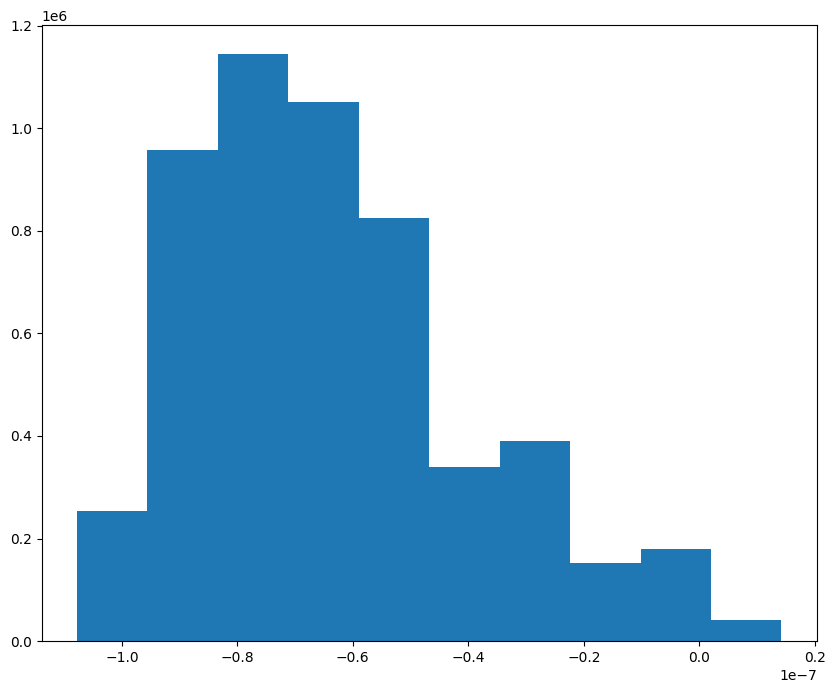

In [16]:
plt.hist(data.flatten())

In [22]:
#dobbiamo fare uno scaling per metterli tra 0 e 1: (D-min)/range
norm = (data-data.min(axis=(1,2),keepdims=True))/((data.max(axis=(1,2),keepdims=True))-(data.min(axis=(1,2),keepdims=True)))

In [23]:
norm.shape

(1302, 64, 64)

In [24]:
norm.max()

1.0

In [25]:
norm.min()

0.0

In [26]:
pos = np.load("spm/spm_struct_pos.npy") #qui ci sono le molecole
neg = np.load("spm/spm_struct_neg.npy") #qui ci sono non molecole

In [27]:
pos.shape, neg.shape

((500, 3), (500, 3))

In [28]:
pos[0] #mi dice immagine e posizione

array([30, 25, 51])

In [29]:
pos.max(axis=0) #l'immagine è il terzo numero

array([  62,   62, 1300])

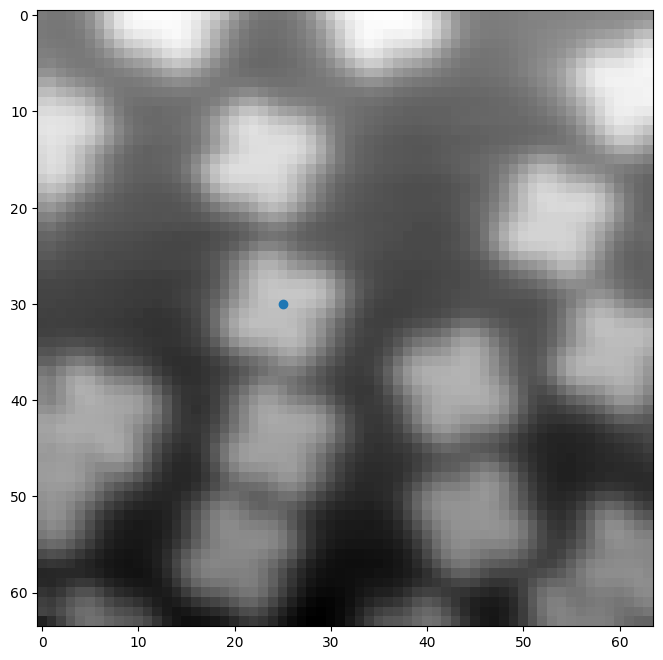

In [31]:
plt.imshow(norm[pos[0][2]])
plt.plot(pos[0][1],pos[0][0],'o')

In [32]:
#adesso creo delle immagini con solo molecola: dette annotazioni
#e delle immagini con solo altro
#guardando la molecola capisco che l'annotazione può essere fatta di 20x20
wid = 10
stmp_pos = []
for ii in range(pos.shape[0]):
  trow, tcol, tind = pos[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol > wid) & (tcol < 64 - wid): #voglio assicurarmi di non essere al limite dell'immagine
    stmp_pos.append(norm[tind,trow-wid:trow+wid,tcol-wid:tcol+wid])

stmp_pos = np.array(stmp_pos)

In [33]:
stmp_pos.shape

(389, 20, 20)

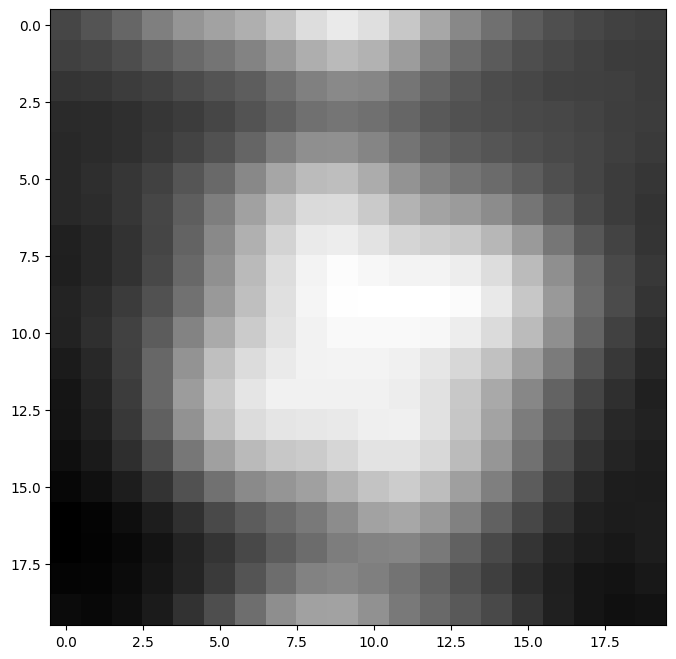

In [34]:
plt.imshow(stmp_pos[0])

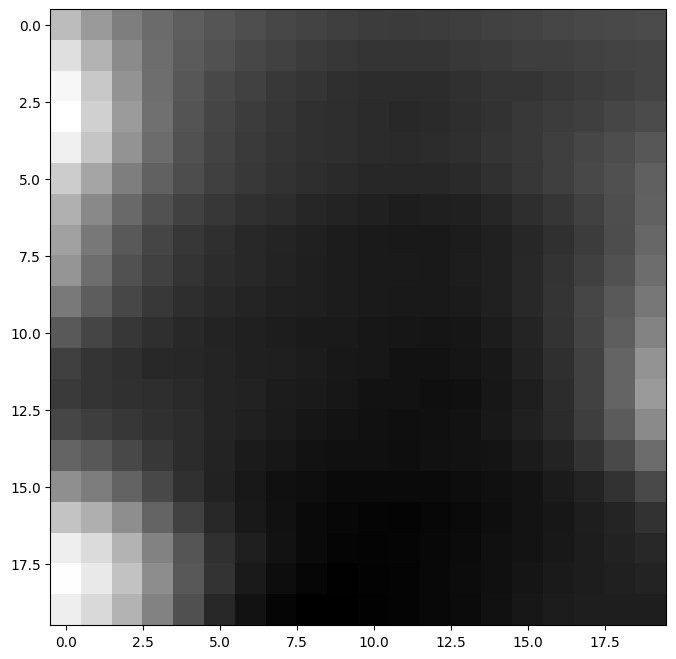

In [35]:
wid = 10
stmp_neg = []
for ii in range(neg.shape[0]):
  trow, tcol, tind = neg[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol > wid) & (tcol < 64 - wid): #voglio assicurarmi di non essere al limite dell'immagine
    stmp_neg.append(norm[tind,trow-wid:trow+wid,tcol-wid:tcol+wid])

stmp_neg = np.array(stmp_neg)
plt.imshow(stmp_neg[0])